In [1]:
import numpy as np

import pandas as pd

In [2]:
df = pd.read_excel("data1.xlsx",index_col=None)

In [3]:
df.head()

,Unnamed: 0,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,...,Att97,Att98,Att99,Att100,Att101,Att102,Att103,prob,Class1,Class2
0,0,0.093700,0.139771,0.062774,0.007698,0.083873,-0.119156,0.073305,0.005510,0.027523,...,-0.038675,-0.039102,0.017429,-0.052659,-0.042402,0.118473,0.125632,0.90,0,0
1,1,-0.022711,-0.050504,-0.035691,-0.065434,-0.084316,-0.378560,0.038212,0.085770,0.182613,...,0.010430,-0.013809,-0.009248,-0.027318,-0.014191,0.022783,0.123785,0.90,0,0
2,2,-0.090407,0.021198,0.208712,0.102752,0.119315,0.041729,-0.021728,0.019603,-0.063853,...,0.002233,-0.002072,-0.010981,0.007615,-0.063378,-0.084181,-0.034402,0.92,0,1
3,3,-0.085235,0.009540,-0.013228,0.094063,-0.013592,-0.030719,-0.116062,-0.131674,-0.165448,...,-0.066604,-0.055773,-0.041941,0.051066,0.004976,0.193972,0.131866,0.95,0,0
4,4,-0.088765,-0.026743,0.002075,-0.043819,-0.005465,0.004306,-0.055865,-0.071484,-0.159025,...,-0.073576,0.050630,0.084832,-0.019570,-0.021650,-0.068326,-0.091155,0.27,1,1


In [4]:
from sklearn.model_selection import train_test_split

In [5]:

X_res = df.drop(columns=['Class1','Class2'],axis=1)

In [6]:
X_res.head()

,Unnamed: 0,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,...,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103,prob
0,0,0.093700,0.139771,0.062774,0.007698,0.083873,-0.119156,0.073305,0.005510,0.027523,...,-0.018712,-0.034711,-0.038675,-0.039102,0.017429,-0.052659,-0.042402,0.118473,0.125632,0.90
1,1,-0.022711,-0.050504,-0.035691,-0.065434,-0.084316,-0.378560,0.038212,0.085770,0.182613,...,0.030594,-0.021814,0.010430,-0.013809,-0.009248,-0.027318,-0.014191,0.022783,0.123785,0.90
2,2,-0.090407,0.021198,0.208712,0.102752,0.119315,0.041729,-0.021728,0.019603,-0.063853,...,0.022294,0.012583,0.002233,-0.002072,-0.010981,0.007615,-0.063378,-0.084181,-0.034402,0.92
3,3,-0.085235,0.009540,-0.013228,0.094063,-0.013592,-0.030719,-0.116062,-0.131674,-0.165448,...,-0.066241,-0.046999,-0.066604,-0.055773,-0.041941,0.051066,0.004976,0.193972,0.131866,0.95
4,4,-0.088765,-0.026743,0.002075,-0.043819,-0.005465,0.004306,-0.055865,-0.071484,-0.159025,...,-0.080882,0.028468,-0.073576,0.050630,0.084832,-0.019570,-0.021650,-0.068326,-0.091155,0.27


In [7]:
y_res = df[['Class2']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.3, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from matplotlib import pyplot

In [10]:
model = RandomForestClassifier()

In [11]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.7866666666666666
[[225  32]
 [ 64 129]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       257
           1       0.80      0.67      0.73       193

    accuracy                           0.79       450
   macro avg       0.79      0.77      0.78       450
weighted avg       0.79      0.79      0.78       450



In [13]:
probs = model.predict(X_test)

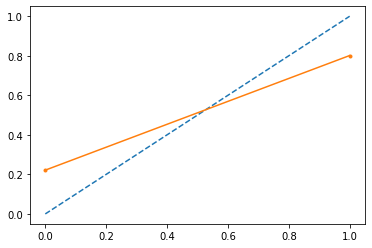

In [15]:
fop, mpv = calibration_curve(y_test, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

/home/nitin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


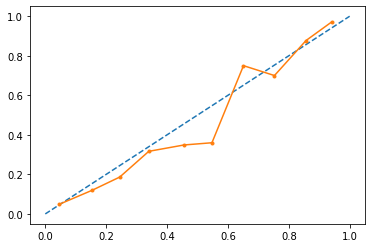

In [17]:
from sklearn.calibration import CalibratedClassifierCV

calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
calibrated.fit(X_train, y_train)
# predict probabilities
probs = calibrated.predict_proba(X_test)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_test, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

/home/nitin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


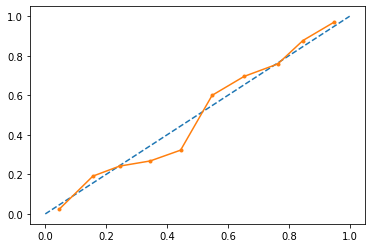

In [19]:
from sklearn.calibration import CalibratedClassifierCV

calibrated = CalibratedClassifierCV(model, method='isotonic', cv=5)
calibrated.fit(X_train, y_train)
# predict probabilities
probs = calibrated.predict_proba(X_test)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_test, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

In [21]:
probs.shape

(450,)